In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from os.path import join
from sklearn.ensemble import IsolationForest

In [39]:
# df_2 = pd.read_csv(join("data",'train_reuter_org_1.csv'),header=None)
df_2 = pd.read_csv(join("data",'train_reuter_877_44_1.csv'),header=None)
test = pd.read_csv(join("data",'test_reuter_877_44_1.csv'),header=None)


In [5]:
#df_2 = pd.read_csv("train_reuter_877_44_1.csv",header=None)
# df_2 = pd.read_csv("train_reuter_org_1.csv",header=None)

In [6]:
df_2.head(15)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.80564,1.03990,1.05160,1.06240,1.06300,1.07220,1.08180,1.09360,1.09570,1.09600,...,1.14010,1.14030,1.14110,1.14120,1.14190,1.14360,1.14380,1.14380,1.14410,0
1,0.94974,0.95941,1.00590,1.00800,1.03210,1.03550,1.04340,1.04350,1.05560,1.05700,...,1.10190,1.10480,1.10550,1.10550,1.10590,1.10700,1.10820,1.11020,1.11170,0
2,0.49153,0.65380,0.70683,0.70803,0.81065,0.85390,0.85520,0.87345,0.90402,0.91982,...,1.10650,1.10660,1.10890,1.11180,1.11390,1.11760,1.11980,1.12120,1.12140,0
3,0.35153,0.58909,0.73177,0.73334,0.77836,0.82453,0.83517,0.83915,0.85313,0.86826,...,0.98292,0.98389,0.99304,0.99457,1.00010,1.00410,1.00500,1.01530,1.01860,0
4,0.65377,0.96085,0.96292,0.98122,0.98278,0.99948,0.99996,1.00170,1.01250,1.01920,...,1.09060,1.09160,1.09200,1.09420,1.09520,1.09730,1.10030,1.10130,1.10130,0
5,0.92654,0.98616,1.03620,1.05940,1.06530,1.06680,1.06810,1.07280,1.07380,1.07510,...,1.13430,1.13520,1.13780,1.13820,1.13970,1.14120,1.14130,1.14160,1.14200,0
6,0.52838,0.85345,0.88262,0.89068,0.91130,0.97044,0.99184,1.00280,1.00460,1.02240,...,1.11960,1.12420,1.12470,1.12870,1.12940,1.12960,1.13200,1.13520,1.13780,0
7,0.49038,0.78243,0.87752,0.89555,0.91822,0.92213,0.97251,0.97571,0.99286,1.01250,...,1.08450,1.08510,1.08800,1.08860,1.08890,1.08970,1.08980,1.09010,1.09050,0
8,0.57544,1.03560,1.04940,1.06900,1.07500,1.07540,1.08100,1.10100,1.10340,1.10620,...,1.14700,1.14840,1.14900,1.14960,1.15010,1.15010,1.15010,1.15050,1.15470,0
9,0.87647,0.98766,1.04660,1.06610,1.07250,1.07470,1.07630,1.08020,1.08360,1.09470,...,1.14360,1.14380,1.14390,1.14410,1.14560,1.14710,1.14760,1.14760,1.14840,0


In [8]:
df_2.shape

(2923, 45)

In [12]:
df_2.describe()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
count,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,...,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.000000,2923.0
mean,0.509538,0.842685,0.892179,0.915792,0.933751,0.947013,0.960807,0.970625,0.979702,0.988179,...,1.083944,1.085680,1.087502,1.089351,1.091115,1.092810,1.094500,1.096091,1.097629,0.0
std,0.277076,0.222094,0.189686,0.177823,0.164739,0.156245,0.146826,0.142155,0.136821,0.131925,...,0.075343,0.074193,0.072836,0.071509,0.070330,0.069278,0.068128,0.067158,0.066284,0.0
min,0.000000,0.210290,0.414870,0.442750,0.470210,0.475130,0.557060,0.572380,0.574770,0.625060,...,0.843650,0.847100,0.859130,0.864840,0.864910,0.881390,0.883410,0.888040,0.888940,0.0
25%,0.325970,0.686455,0.746735,0.785320,0.806815,0.826700,0.846355,0.858310,0.873320,0.886815,...,1.038550,1.040800,1.043600,1.046700,1.048250,1.050850,1.052900,1.056050,1.057750,0.0
50%,0.572670,0.937480,0.985790,1.008800,1.023400,1.035800,1.043400,1.049500,1.056400,1.061500,...,1.122500,1.124200,1.125200,1.126100,1.127400,1.128200,1.129200,1.130600,1.131600,0.0
75%,0.721230,1.033550,1.048000,1.059800,1.067300,1.071350,1.075900,1.080300,1.085550,1.091050,...,1.140400,1.141150,1.141950,1.142600,1.143350,1.144000,1.144500,1.145300,1.146300,0.0
max,1.030600,1.061000,1.084500,1.086000,1.086800,1.098800,1.104000,1.108900,1.116400,1.119000,...,1.155600,1.156800,1.158000,1.158600,1.159800,1.160300,1.161600,1.162900,1.164200,0.0


In [13]:
df_2.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44],
           dtype='int64')

In [22]:
columns = [f"w{i}" for  i in range(len(df_2.columns)-1)]
columns.append("is_anomal")
df_2.columns = columns

datax = df_2.iloc[:,:-1]
anomal = df_2.iloc[:,-1]

In [24]:
columns.append("is_anomal")

In [26]:
df_2.columns = columns

In [28]:
df_2.head(10)

,w0,w1,w2,w3,w4,w5,w6,w7,w8,w9,...,w35,w36,w37,w38,w39,w40,w41,w42,w43,is_anomal
0,0.80564,1.03990,1.05160,1.06240,1.06300,1.07220,1.08180,1.09360,1.09570,1.09600,...,1.14010,1.14030,1.14110,1.14120,1.1419,1.1436,1.1438,1.1438,1.1441,0
1,0.94974,0.95941,1.00590,1.00800,1.03210,1.03550,1.04340,1.04350,1.05560,1.05700,...,1.10190,1.10480,1.10550,1.10550,1.1059,1.1070,1.1082,1.1102,1.1117,0
2,0.49153,0.65380,0.70683,0.70803,0.81065,0.85390,0.85520,0.87345,0.90402,0.91982,...,1.10650,1.10660,1.10890,1.11180,1.1139,1.1176,1.1198,1.1212,1.1214,0
3,0.35153,0.58909,0.73177,0.73334,0.77836,0.82453,0.83517,0.83915,0.85313,0.86826,...,0.98292,0.98389,0.99304,0.99457,1.0001,1.0041,1.0050,1.0153,1.0186,0
4,0.65377,0.96085,0.96292,0.98122,0.98278,0.99948,0.99996,1.00170,1.01250,1.01920,...,1.09060,1.09160,1.09200,1.09420,1.0952,1.0973,1.1003,1.1013,1.1013,0
5,0.92654,0.98616,1.03620,1.05940,1.06530,1.06680,1.06810,1.07280,1.07380,1.07510,...,1.13430,1.13520,1.13780,1.13820,1.1397,1.1412,1.1413,1.1416,1.1420,0
6,0.52838,0.85345,0.88262,0.89068,0.91130,0.97044,0.99184,1.00280,1.00460,1.02240,...,1.11960,1.12420,1.12470,1.12870,1.1294,1.1296,1.1320,1.1352,1.1378,0
7,0.49038,0.78243,0.87752,0.89555,0.91822,0.92213,0.97251,0.97571,0.99286,1.01250,...,1.08450,1.08510,1.08800,1.08860,1.0889,1.0897,1.0898,1.0901,1.0905,0
8,0.57544,1.03560,1.04940,1.06900,1.07500,1.07540,1.08100,1.10100,1.10340,1.10620,...,1.14700,1.14840,1.14900,1.14960,1.1501,1.1501,1.1501,1.1505,1.1547,0
9,0.87647,0.98766,1.04660,1.06610,1.07250,1.07470,1.07630,1.08020,1.08360,1.09470,...,1.14360,1.14380,1.14390,1.14410,1.1456,1.1471,1.1476,1.1476,1.1484,0


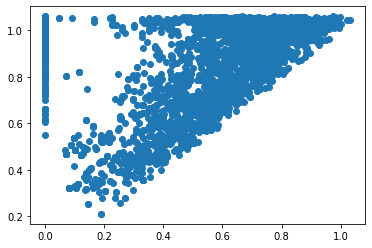

In [29]:
plt.scatter(df_2.w0 , df_2.w1)

/Users/suminbae/opt/anaconda3/envs/newEnv/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


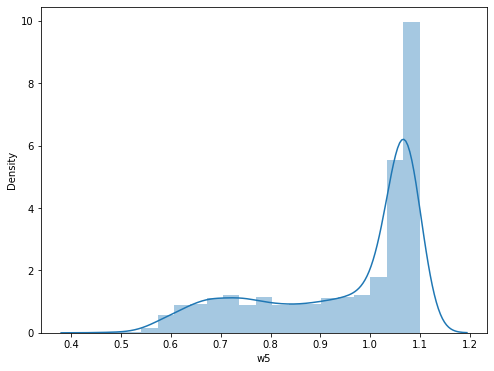

In [32]:
plt.figure(figsize=(8,6))
sns.distplot(df_2.w5)
plt.show()

In [36]:
datax = df_2.iloc[:,:-1]
anomal = df_2.iloc[:,-1]

In [49]:
t = datax.iloc[:,6:9]

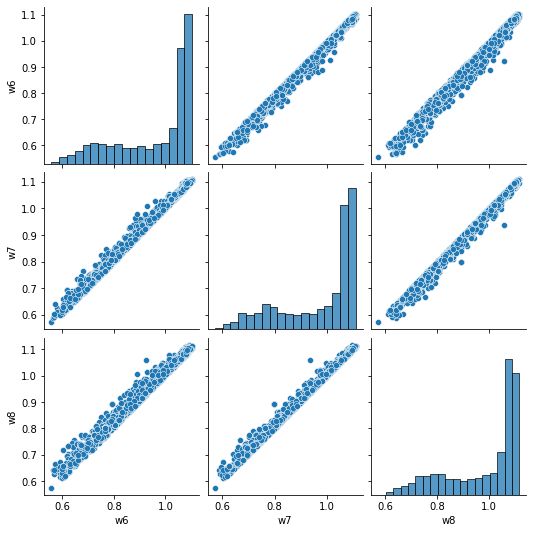

In [50]:
sns.pairplot(data=t)

In [54]:
clf = IsolationForest()

In [55]:
clf.fit(datax)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [56]:
train_predict = clf.predict(datax)